# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the data 

In [2]:
import pandas as pd
import numpy as np


In [3]:
admissions = pd.read_csv('drive/MyDrive/DS/core/admissions.csv')
patients = pd.read_csv('drive/MyDrive/DS/core/patients.csv')
diagnose = pd.read_csv('drive/MyDrive/DS/hosp/d_icd_diagnoses.csv')
subj_diagnose = pd.read_csv('drive/MyDrive/DS/hosp/diagnoses_icd.csv')


In [4]:
def get_cohort(icd_number):
    df1=patients.set_index('subject_id')
    df2=subj_diagnose[subj_diagnose['icd_code'].str.contains(str(icd_number))].drop_duplicates('subject_id', keep='first').set_index('subject_id')
    data = df2.join(df1)
    data['dod']=data['dod'].replace(np.nan, 0, regex=True)
    data['dod']=data['dod'].replace('-', 1, regex=True)

    return data

def mortality_rate(df):
    return np.count_nonzero(df['dod']==1)/len(df['dod'])

In [5]:
data = get_cohort('I61')
print('cohort size', data.shape[0])
print('mortality_rate', mortality_rate(data))
data

cohort size 1331
mortality_rate 0.24417731029301276


,hadm_id,seq_num,icd_code,icd_version,gender,anchor_age,anchor_year,anchor_year_group,dod
subject_id,,,,,,,,,
12987308,29175492,2,I615,10,F,66,2129,2014 - 2016,0
18431316,21877054,2,I614,10,M,71,2134,2014 - 2016,0
13502902,22115430,3,I615,10,F,56,2160,2014 - 2016,0
17096041,24581169,1,I618,10,M,75,2120,2014 - 2016,0
12675886,28521489,5,I611,10,M,62,2177,2014 - 2016,0
...,...,...,...,...,...,...,...,...,...
14050724,20952526,1,I615,10,F,57,2112,2011 - 2013,0
12557389,21294125,1,I613,10,F,79,2151,2017 - 2019,0
18065731,25556934,1,I618,10,M,46,2137,2011 - 2013,0


In [ ]:
diagnose[diagnose['icd_code'].str.contains('S0636')]

,icd_code,icd_version,long_title
45433,S0636,10,"Traumatic hemorrhage of cerebrum, unspecified"
45434,S06360,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45435,S06360A,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45436,S06360D,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45437,S06360S,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45438,S06361,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45439,S06361A,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45440,S06361D,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45441,S06361S,10,"Traumatic hemorrhage of cerebrum, unspecified,..."
45442,S06362,10,"Traumatic hemorrhage of cerebrum, unspecified,..."


In [ ]:
diagnose[diagnose['icd_code'].str.contains('I61')]

,icd_code,icd_version,long_title
24846,I61,10,Nontraumatic intracerebral hemorrhage
24847,I610,10,Nontraumatic intracerebral hemorrhage in hemis...
24848,I611,10,Nontraumatic intracerebral hemorrhage in hemis...
24850,I612,10,Nontraumatic intracerebral hemorrhage in hemis...
24851,I613,10,Nontraumatic intracerebral hemorrhage in brain...
24852,I614,10,Nontraumatic intracerebral hemorrhage in cereb...
24853,I615,10,"Nontraumatic intracerebral hemorrhage, intrave..."
24854,I616,10,"Nontraumatic intracerebral hemorrhage, multipl..."
24855,I618,10,Other nontraumatic intracerebral hemorrhage
24856,I619,10,"Nontraumatic intracerebral hemorrhage, unspeci..."


In [ ]:
for i in range(test_events.shape[0]):
    entry = test_events.iloc[i,:]
    sub_id, itemid = entry[['subject_id', 'itemid']]
    test_main.loc[sub_id, itemid] = entry['value']
test_main.head() 

,gender,anchor_age,anchor_year,anchor_year_group,dod,226588,226559,226576,226627,226599,...,226598,226608,226595,226600,226591,226614,229413,226558,226606,226630
subject_id,,,,,,,,,,,,,,,,,,,,,
10127185,M,60,2141,2008 - 2010,NaN,20.0,60.0,NaN,550.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10390732,M,48,2143,2011 - 2013,NaN,50.0,150.0,200.0,200.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10651616,M,67,2182,2014 - 2016,NaN,20.0,200.0,25.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10785948,F,77,2122,2017 - 2019,NaN,20.0,320.0,100.0,300.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12006998,M,44,2130,2014 - 2016,2130-12-02,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


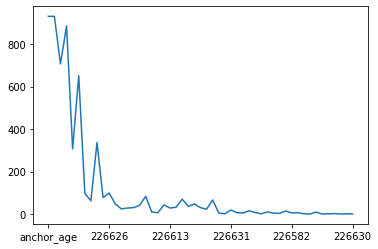

In [ ]:
test_main.describe().loc['count', :].plot()